<a href="https://colab.research.google.com/github/andreygolubkow/OptimizationMethodics/blob/master/MPPR_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В блоке ниже представлено решение с помощью внутренних алгоритмов языка, они  работают верно.
Где def f(x), после return пишем свою функцию. Вместо этой: math.sin(math.fabs(k*x)) .
Где -0.6 и 0.6 это интервал.
После запуска кода будет выведено число - это значение икса.

In [0]:
exp = 2.7182818284590452353602874713527

A = -0.6
B = 0.6

def f(x):
  k = 2
  return math.sin(math.fabs(k*x))


In [0]:
import numpy as n
from scipy.optimize import minimize_scalar

res = minimize_scalar(f, bounds=(A, B), method='bounded')
print (res.x)

2.7755575615628914e-17


Метод деления отрезка

In [0]:
import math

def Segment():
  a = A
  b = B
  e = 0.0001
  delta = (b-a)/10
  while(math.fabs(b-a) <= e):
    x1 = (a+b)/2 - delta
    x2 = (a+b)/2 + delta
    fx1 = f(x1)
    fx2 = f(x2)
    if (fx1 < fx2):
      b = x2
    if (fx1 > fx2):
      a = x1
  return (a+b)/2
      
print(Segment())

0.0


Метод золотого сечения

In [0]:
import math

def GoldenSection():
  a = A
  b = B
  e = 0.01
  y = a + (3 - math.sqrt(5)) * (b-a) / 2
  z = a + b - y
  while(math.fabs(b - a) <= e):  
    if (f(y) <= f(z)):
      b = z
      z = y
      y0 = y
      y = a + b - y0
    if (f(y) > f(z)):
      a = y
      z0 = z
      y = z
      z = a + b - z0
  return (a+b)/2
      
print(GoldenSection())

0.0


Классический метод

In [0]:
import math
from scipy.misc import derivative

def Find(f, a, b, eps=1e-5):
    while abs(b - a) > eps:
        x = (a + b) / 2.0
        fx = derivative(f, x, dx = eps)
        fa = derivative(f, a, dx = eps)
        if (fx < 0 and fa < 0) or (fx > 0 and fa > 0):
            a = x
        else:
            b = x
    return x

def ValidateMinimum(x):
  delta = 0.0001
  eps=1e-5
  dfMin = derivative(f, x - delta, dx = eps)
  dfMax = derivative(f, x + delta, dx = eps)
  print("df(x-delta)=", dfMin)
  print("df(x+delta)=", dfMax)
  if (dfMin < 0) and (dfMax > 0):
    print("This is the minimum point")
    
    
x = Find(f, A, B)
print("x =",x)
ValidateMinimum(x)
print("f(a)=", f(A))
print("f(b)=", f(B))
print("f(x)=", f(x))


x = -9.1552734375e-06
df(x-delta)= -1.9999999522071725
df(x+delta)= 1.9999999668556085
This is the minimum point
f(a)= 0.9320390859672263
f(b)= 0.9320390859672263
f(x)= 1.8310546873976817e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: numpy.arange
  


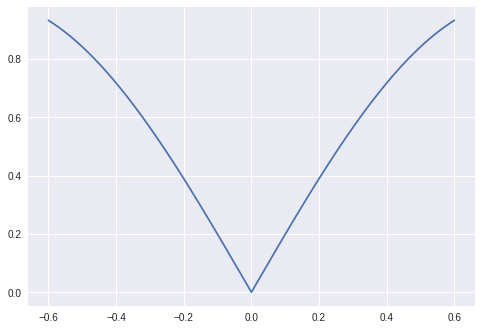

In [0]:
import math
import pylab
from matplotlib import mlab

dx = 0.001
xlist = mlab.frange (A, B, dx)
ylist = [f (x) for x in xlist]
pylab.plot (xlist, ylist)
pylab.show()